In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
file_path = "heart_disease.xlsx"
df = pd.ExcelFile(file_path)


In [3]:
print(df.sheet_names)


data = pd.read_excel(file_path, sheet_name='Heart_disease')
data.head()

['Description', 'Heart_disease']


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
print("Shape of dataset:", data.shape)


print(data.info())


data.describe(include="all")

Shape of dataset: (908, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,386,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [5]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:", categorical_cols)

encoder = LabelEncoder()
for col in categorical_cols:
    # Convert column to string type first to ensure uniform data type
    data[col] = data[col].astype(str)
    # Then apply label encoding
    data[col] = encoder.fit_transform(data[col])

data.head()

Categorical Columns: Index(['exang', 'slope', 'thal'], dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [9]:
X = data.drop("num", axis=1)
y = data["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.5054945054945055

Confusion Matrix:
 [[67  9  1  3  0]
 [18 19  2 14  0]
 [ 8 10  0  4  0]
 [ 5  8  2  6  0]
 [ 2  2  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        80
           1       0.40      0.36      0.38        53
           2       0.00      0.00      0.00        22
           3       0.22      0.29      0.25        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.26      0.30      0.27       182
weighted avg       0.44      0.51      0.47       182



C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chandu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


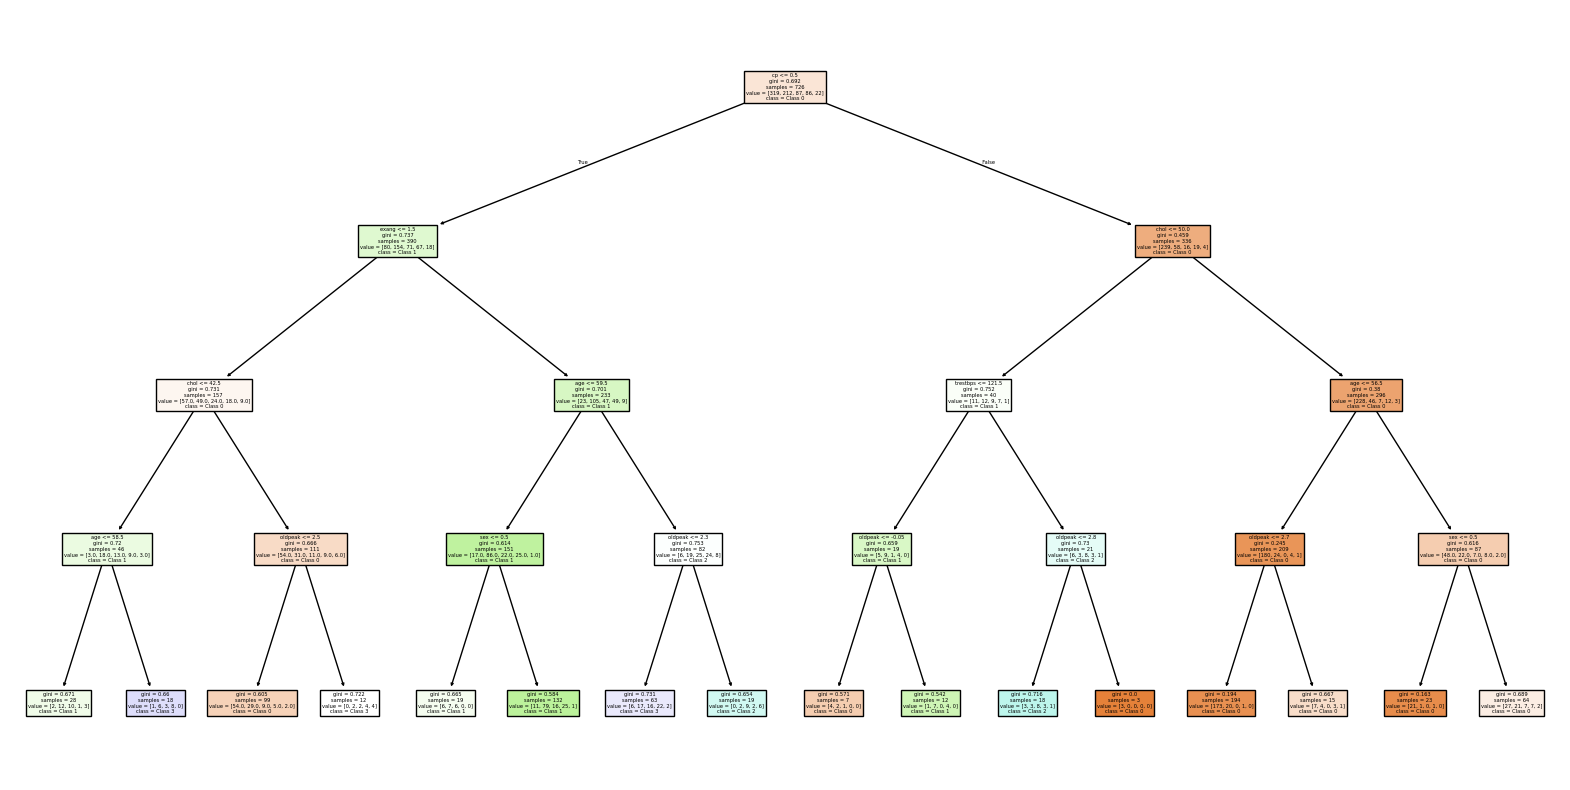

In [13]:
# Import necessary libraries if not already imported
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Check the number of classes in your classifier
n_classes = len(clf.classes_)

# Create appropriate class names based on the actual number of classes
if n_classes == 2:
    class_names = ["No Disease", "Disease"]
else:
    # Create generic class names if you have a different number of classes
    class_names = [f"Class {i}" for i in range(n_classes)]

# Create the plot with the correct class names
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [14]:
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst 5 Rows:\n", data.head())

Dataset Shape: (908, 13)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      1      2.3      0   
1   41    1   1       135   203    0        1     132      1      0.0      1   
2   57    1   0       140   192    0        1     148      1      0.4      1   
3   52    1   3       118   186    0        0     190      1      0.0      1   
4   57    1   0       110   201    0        1     126      3      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


In [15]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [16]:
# Summary statistics
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,1.761013,0.891253,1.155286,1.187225,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.983401,1.093875,0.691023,0.735141,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,1.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,3.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,3.000000,6.200000,2.000000,2.000000,4.000000


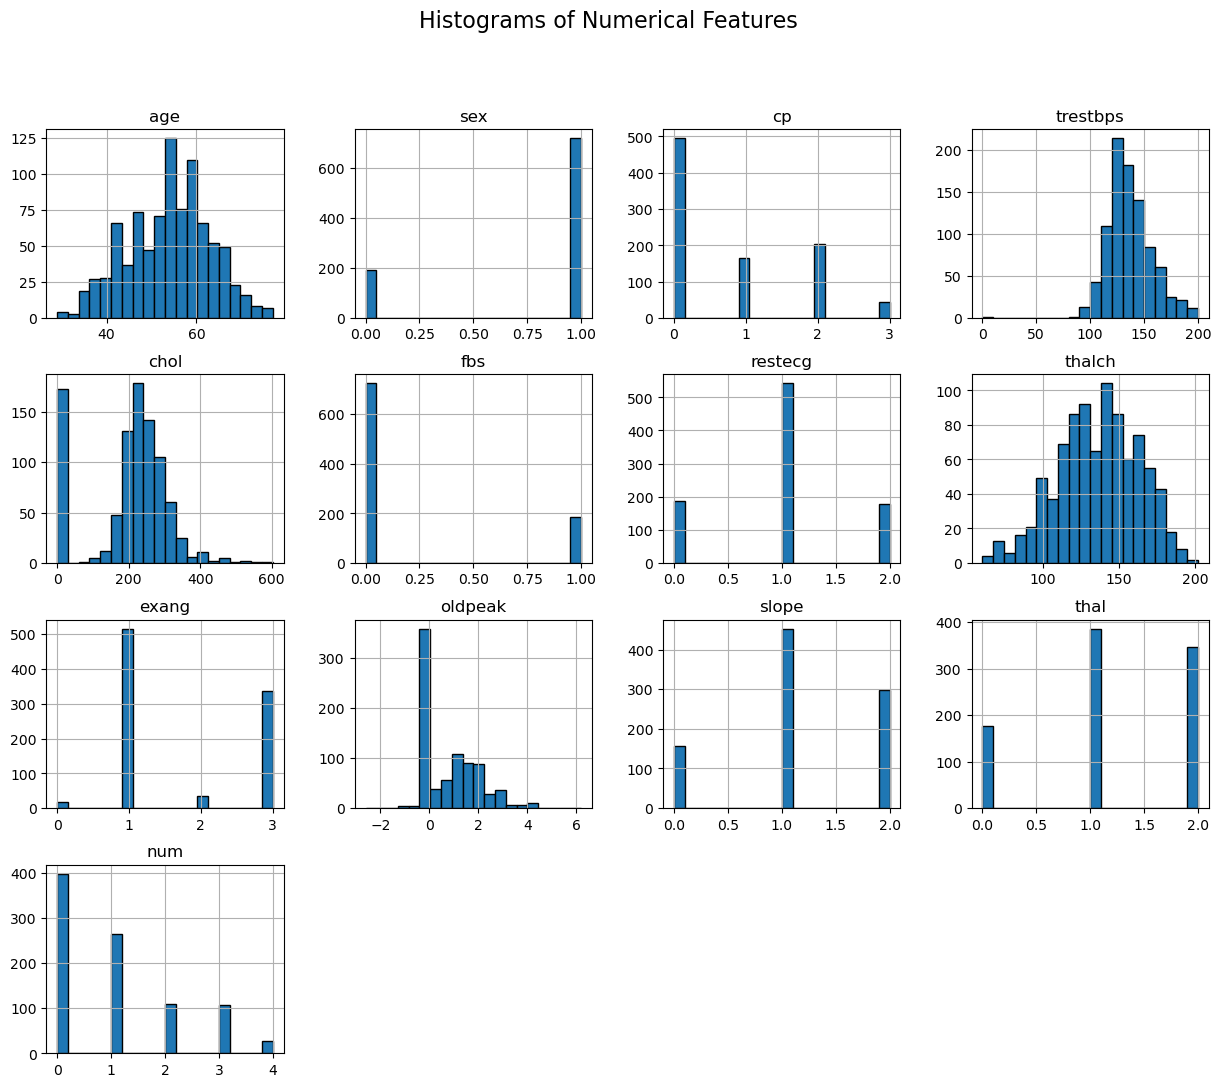

In [17]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

data[num_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

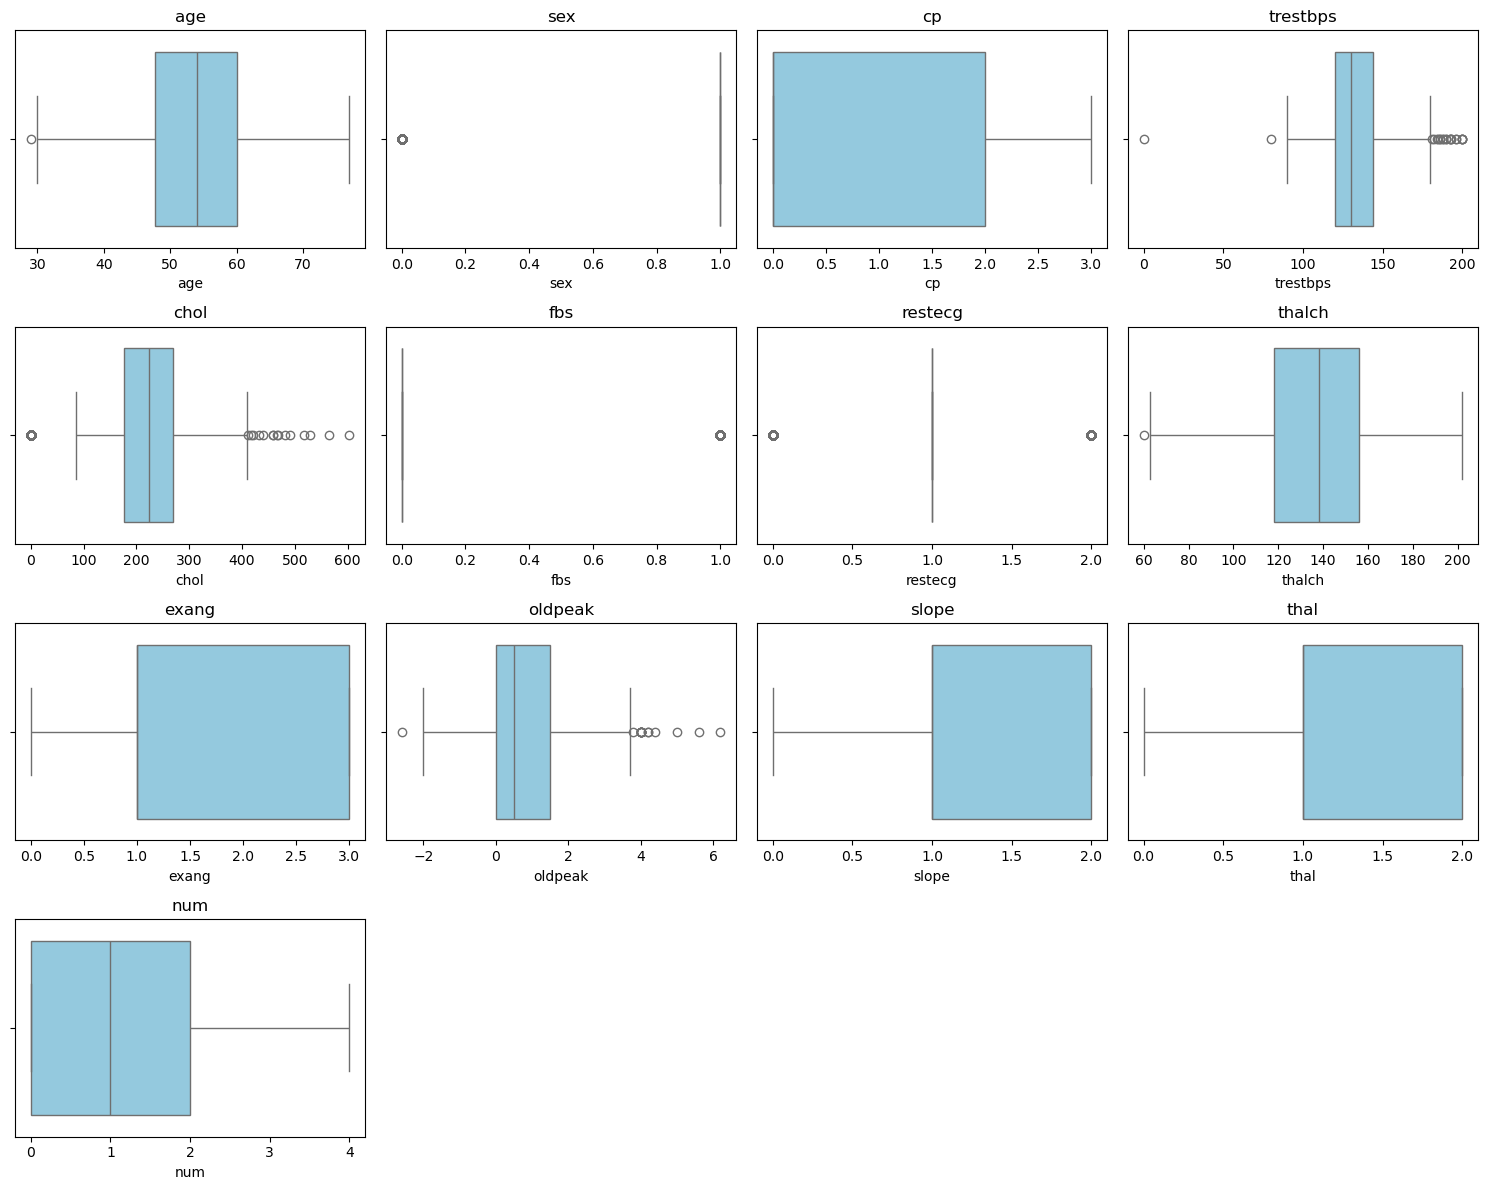

In [19]:
# First, determine how many numerical columns you have
num_cols_count = len(num_cols)

# Create appropriate figure size and subplot layout
rows = (num_cols_count + 3) // 4  # Calculate how many rows needed (ceiling division)
plt.figure(figsize=(15, rows * 3))  # Adjust figure height based on number of rows

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)  # Use dynamic row count instead of hardcoded 3
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
cat_cols = data.select_dtypes(include=['int32','int64']).columns.difference(num_cols)

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()

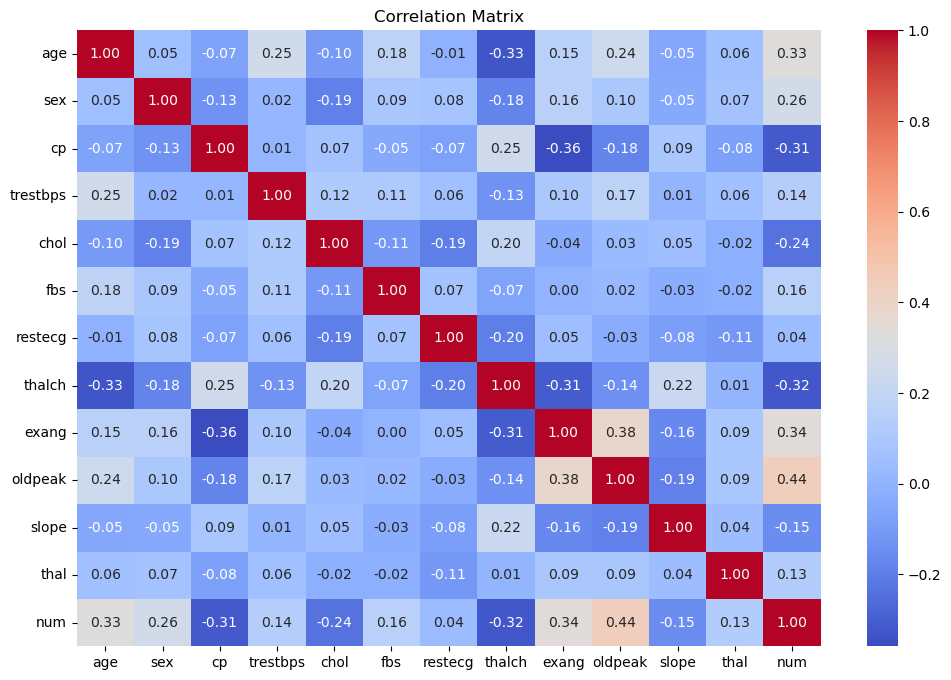

In [21]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
bool_cols = data.select_dtypes(include=['bool']).columns
for col in bool_cols:
    data[col] = data[col].astype(int)

print("Converted Boolean Columns:", bool_cols.tolist())

Converted Boolean Columns: []


In [23]:
from sklearn.preprocessing import LabelEncoder

str_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in str_cols:
    data[col] = encoder.fit_transform(data[col])

print("Encoded String Columns:", str_cols.tolist())

Encoded String Columns: []


In [24]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['int64','float64']).columns.drop("num")

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print("Scaled Numerical Columns:", num_cols.tolist())

Scaled Numerical Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']


In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.774285,1.288612,-1.672770,-1.615852,0
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.774285,-0.815249,-0.224843,-1.615852,0
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.774285,-0.449360,-0.224843,-1.615852,0
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.774285,-0.815249,-0.224843,-1.615852,0
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.260594,0.556834,-0.224843,-1.615852,0


In [27]:
from sklearn.model_selection import train_test_split

X = data.drop("num", axis=1)
y = data["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (726, 12)
Testing set size: (182, 12)


In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion="gini",  # could also try "entropy"
    max_depth=5,       # limit depth to avoid overfitting
    random_state=42
)

clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [33]:
from sklearn.preprocessing import label_binarize

# Get probability predictions for all classes
y_pred_prob = clf.predict_proba(X_test)

# Binarize labels for ROC (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC-AUC (One-vs-Rest strategy)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class="ovr", average="macro")
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.6755710591996513


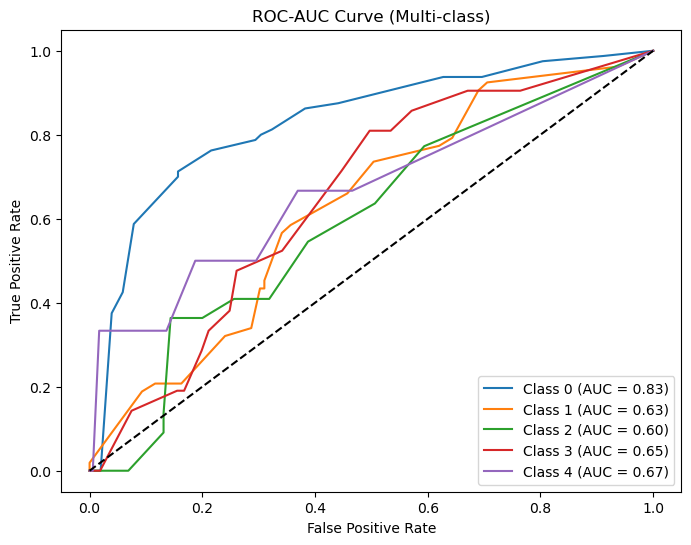

In [34]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Multi-class)")
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5688615965989609


In [36]:
best_dt = grid_search.best_estimator_

y_pred_best = best_dt.predict(X_test)
y_pred_prob_best = best_dt.predict_proba(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Test Accuracy: 0.5164835164835165

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        80
           1       0.41      0.57      0.48        53
           2       0.00      0.00      0.00        22
           3       0.20      0.14      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.27      0.29      0.28       182
weighted avg       0.46      0.52      0.48       182


Confusion Matrix:
 [[61 16  1  2  0]
 [13 30  2  7  1]
 [ 7 12  0  3  0]
 [ 3 11  4  3  0]
 [ 0  4  2  0  0]]


C:\Users\chandu\AppData\Local\Temp\ipykernel_11936\3515725912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


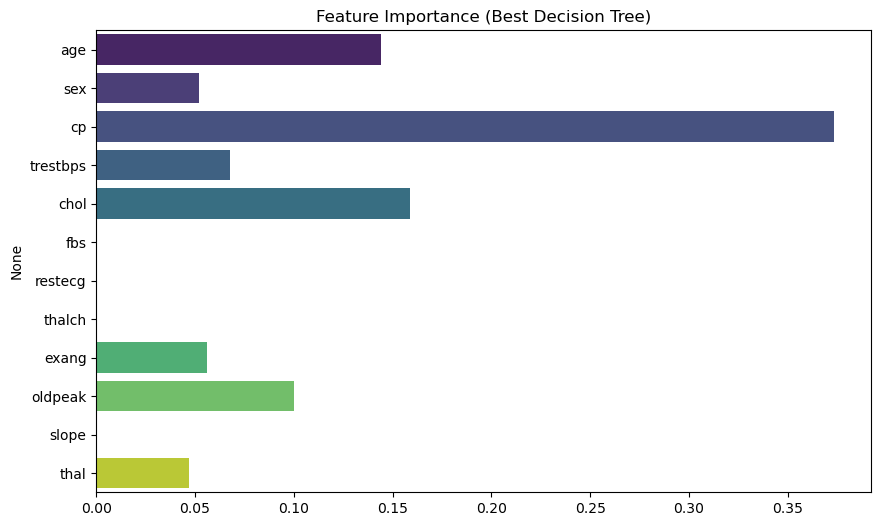

In [37]:
importances = best_dt.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Best Decision Tree)")
plt.show()

In [38]:
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Final Model Accuracy: 0.5164835164835165

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        80
           1       0.41      0.57      0.48        53
           2       0.00      0.00      0.00        22
           3       0.20      0.14      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.27      0.29      0.28       182
weighted avg       0.46      0.52      0.48       182


Confusion Matrix:
 [[61 16  1  2  0]
 [13 30  2  7  1]
 [ 7 12  0  3  0]
 [ 3 11  4  3  0]
 [ 0  4  2  0  0]]


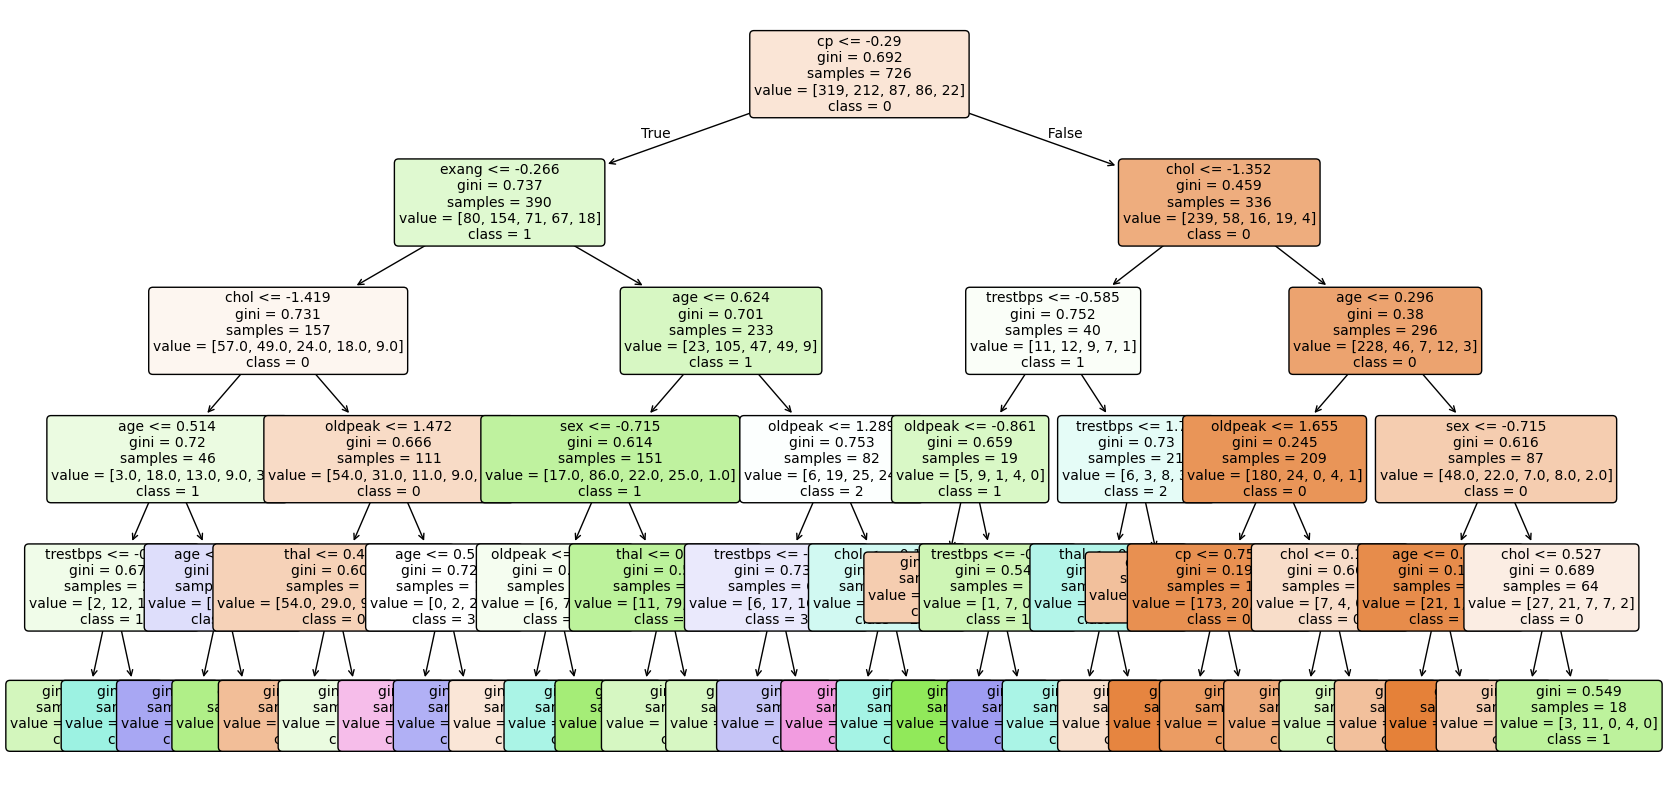

In [39]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, 
          feature_names=X.columns, 
          class_names=[str(c) for c in np.unique(y)], 
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

C:\Users\chandu\AppData\Local\Temp\ipykernel_11936\257690364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="coolwarm")


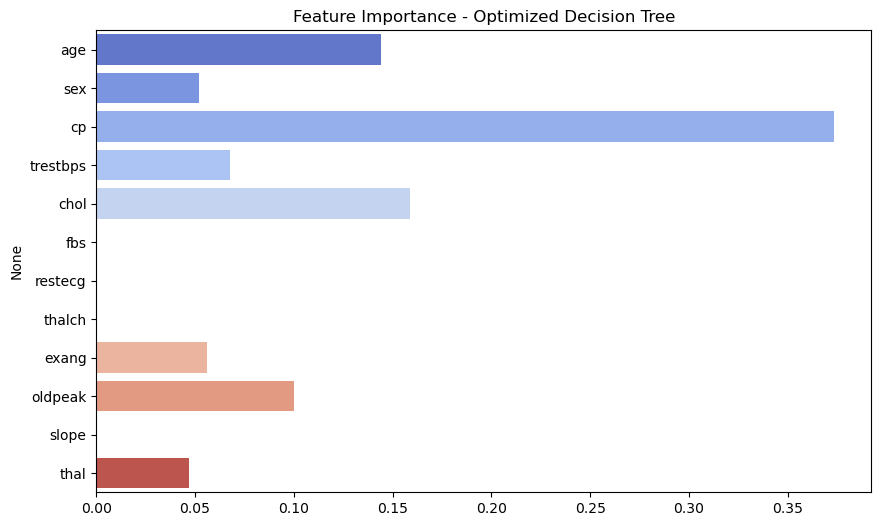

In [40]:
importances = best_dt.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.title("Feature Importance - Optimized Decision Tree")
plt.show()